<a href="https://colab.research.google.com/github/emm-gl/WA2501_Machine_Learning_AI/blob/main/M%26DL2501-Math%26DeepLearning/Bloque02/DL_Semana2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Dataset MNIST

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Se normaliza con el 255

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # [N,28,28,1]
x_test = np.expand_dims(x_test, -1)


In [6]:
x_train.shape
#Solo se tiene un canal

(60000, 28, 28, 1)

In [8]:
value_counts = Counter(y_train)
print(value_counts)

Counter({np.uint8(1): 6742, np.uint8(7): 6265, np.uint8(3): 6131, np.uint8(2): 5958, np.uint8(9): 5949, np.uint8(0): 5923, np.uint8(6): 5918, np.uint8(8): 5851, np.uint8(4): 5842, np.uint8(5): 5421})


In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
i = 34
img = x_train[i]

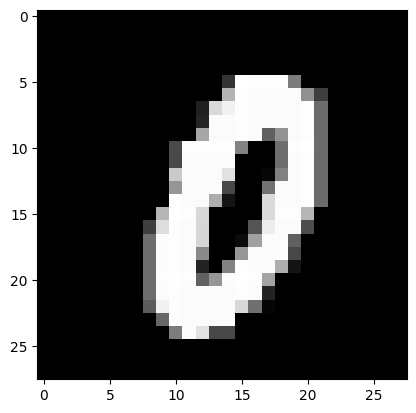

In [12]:
plt.imshow(img, cmap="gray")

In [13]:
y_train[i]

np.uint8(0)

# Operaciones en una CNN

## 1. Convolución

**Qué hace:**
Proceso donde un *filtro* (o *kernel*) pequeño —por ejemplo de tamaño 3×3— se desliza sobre la imagen y calcula una combinación ponderada (multiplicación y suma) de los píxeles bajo él.

**Ejemplo:**
Si tienes una imagen de 5×5 píxeles y aplicas un filtro 3×3, en cada posición el filtro toma una pequeña porción (3×3) de la imagen, multiplica cada valor por el peso correspondiente del filtro y suma todos esos valores → ese resultado es **un nuevo píxel** de la imagen salida (el *mapa de características*).

**Intuición:**
Cada filtro aprende a detectar un patrón visual: bordes, texturas, esquinas, etc.

---

## 2. Padding (relleno)

Cuando aplicas una convolución, la imagen se "encoge" (por ejemplo, una imagen 5×5 con filtro 3×3 produce una salida de 3×3).
**Padding** sirve para *rellenar los bordes* de la imagen con ceros (u otros valores), evitando esa reducción.

**Tipos comunes:**

* `"valid"` → sin padding, la salida se reduce.
* `"same"` → se añade el padding necesario para que la salida tenga el mismo tamaño que la entrada.

**Intuición:**
Padding evita perder información de los bordes y mantiene la resolución.

---

## 3. Stride (paso)

El **stride** indica *cuánto se mueve el filtro* en cada paso cuando se desliza sobre la imagen.

**Ejemplo:**

* Stride = 1 → el filtro se mueve 1 píxel a la vez (superposición máxima, salida grande).
* Stride = 2 → se mueve 2 píxeles (menos superposición, salida más pequeña).

**Intuición:**
Stride controla la *resolución espacial* de la salida. Cuanto mayor el stride, más compresión espacial (y menor coste computacional).

---

## 4. Pooling

**Pooling** reduce el tamaño espacial de los mapas de características, conservando la información más importante.

**Tipos comunes:**

* **MaxPooling:** toma el valor máximo dentro de una ventana (ej. 2×2).
* **AveragePooling:** toma el promedio.

**GlobalMaxPooling:** toma el máximo de *toda* la característica (por canal), reduciendo el mapa completo a un solo valor por canal.

**Intuición:**
Pooling resume regiones locales → hace la red más robusta a pequeñas traslaciones o distorsiones.

---

* La convolución detecta patrones.
* El padding mantiene dimensiones.
* El stride controla la velocidad de desplazamiento del filtro.
* El pooling reduce y resume la información.



# CNN model

In [15]:
inputs = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(8, (3,3), activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)        ##Para utilizar una capa densa se necesita un vector, por eso se le hace flatten a la matriz de la imagen:
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

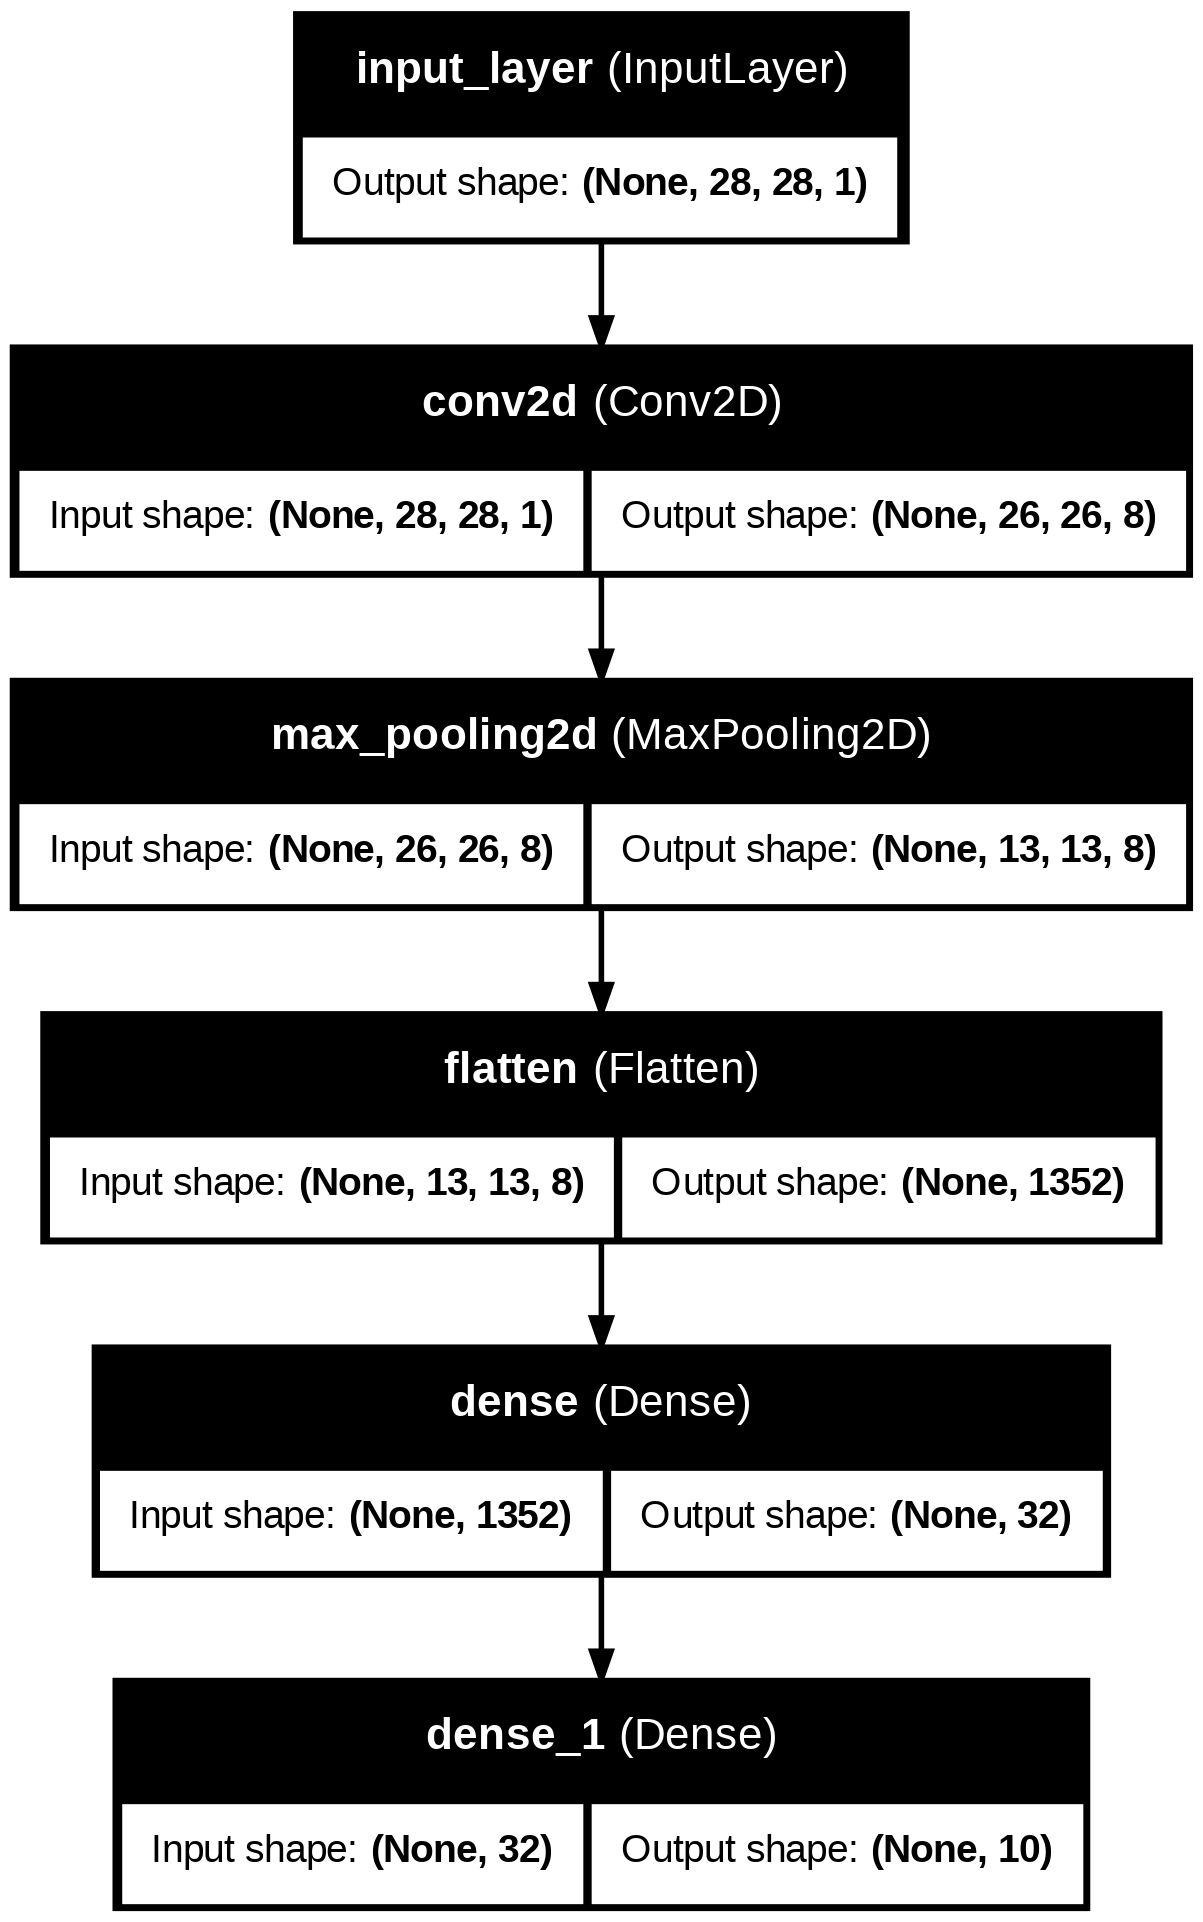

In [17]:
!pip install graphviz
import pydot
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(filename='model.png')

# Training

In [18]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7754 - loss: 0.7837 - val_accuracy: 0.9540 - val_loss: 0.1593
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9487 - loss: 0.1772 - val_accuracy: 0.9705 - val_loss: 0.1092
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9655 - loss: 0.1205 - val_accuracy: 0.9757 - val_loss: 0.0921
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9726 - loss: 0.0930 - val_accuracy: 0.9790 - val_loss: 0.0798
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9772 - loss: 0.0791 - val_accuracy: 0.9787 - val_loss: 0.0770
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9818 - loss: 0.0631 - val_accuracy: 0.9795 - val_loss: 0.0751
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9827 - loss: 0.0593 - val_accuracy: 0.9800 - val_loss: 0.0682
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9844 - loss: 0.0517 - 

In [19]:
img = x_test[0:1]
img.shape

(1, 28, 28, 1)

In [20]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[1.4846449e-10, 1.2864728e-08, 9.9716708e-08, 1.3471177e-05,
        1.4495736e-09, 3.1626559e-11, 9.2054467e-13, 9.9998569e-01,
        1.1950261e-08, 7.1760775e-07]], dtype=float32)

In [21]:
np.argmax(model.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


np.int64(7)

In [22]:
y_test[0]

np.uint8(7)

# Extraemos filtros de la primera capa

In [23]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        43,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,120 (512.19 KB)

 Trainable params: 43,706 (170.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 87,414 (341.46 KB)

In [ ]:
model.layers[1].get_weights()

In [27]:
filters, biases = model.layers[1].get_weights()
print("Forma de los filtros:", filters.shape)

Forma de los filtros: (3, 3, 1, 8)


In [28]:
filters[:,:, 0, 0]

array([[-1.1090261 , -0.94074214, -0.47974208],
       [ 0.2923608 ,  0.4430154 , -0.20086126],
       [ 0.8937214 ,  0.3624739 ,  0.53992563]], dtype=float32)

# Visualizamos filtros y sus FFT

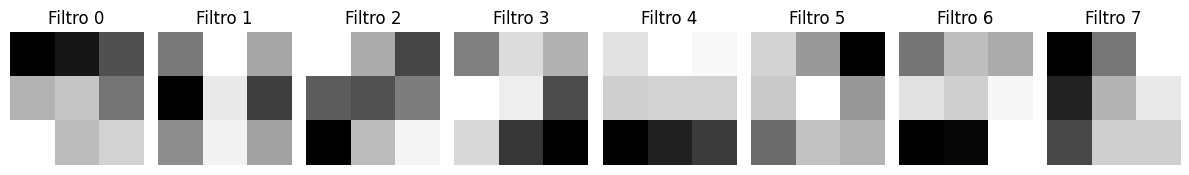

In [34]:
plt.figure(figsize=(12,6))
for i in range(filters.shape[-1]):  # cada filtro
    f = filters[:, :, 0, i]

    # Plot filtro
    plt.subplot(2, filters.shape[-1], i+1)
    plt.imshow(f, cmap="gray")
    plt.axis("off")
    plt.title(f"Filtro {i}")

plt.tight_layout()
plt.show()


# Ejemplo de una convolución con una imagen

In [58]:
img = x_test[0:1]

In [59]:
first_layer = model.layers[1] #La capa de la convolución
first_layer.output

<KerasTensor shape=(None, 26, 26, 8), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>

In [60]:
activation_model = tf.keras.Model(inputs=model.input,
                                  outputs=first_layer.output)

activations = activation_model.predict(img)

activations.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


(1, 26, 26, 8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Forma de la activación: (1, 26, 26, 8)


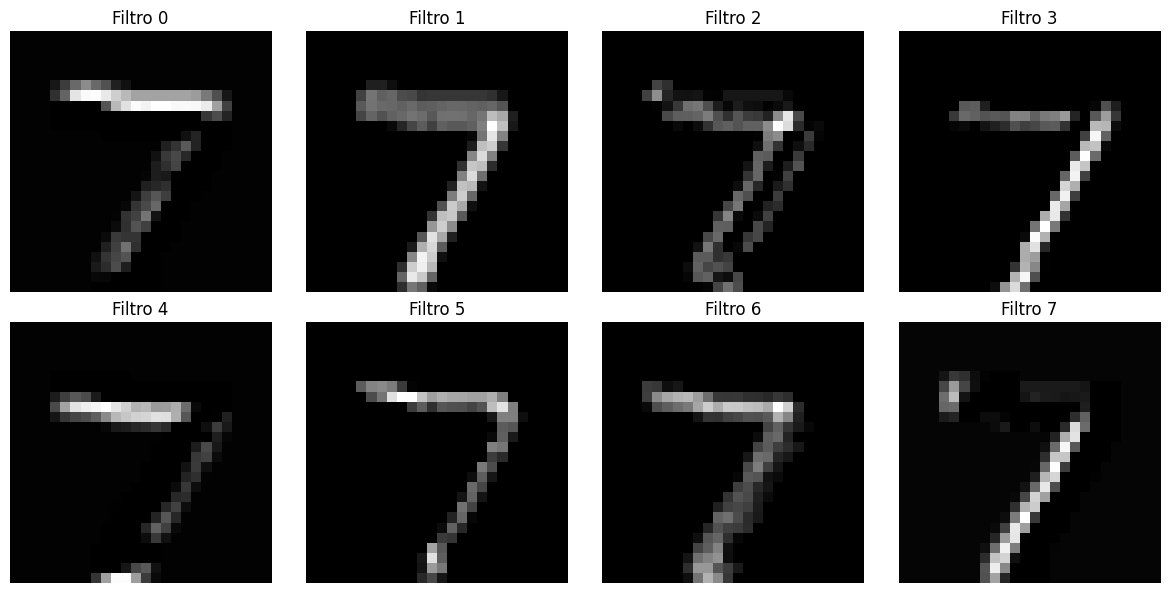

In [61]:
activations = activation_model.predict(img)

print("Forma de la activación:", activations.shape)

plt.figure(figsize=(12,6))
for i in range(activations.shape[-1]):
    plt.subplot(2, 4, i+1)
    plt.imshow(activations[0,:,:,i], cmap="gray")
    plt.axis("off")
    plt.title(f"Filtro {i}")

plt.tight_layout()
plt.show()

In [62]:
activations.shape

(1, 26, 26, 8)

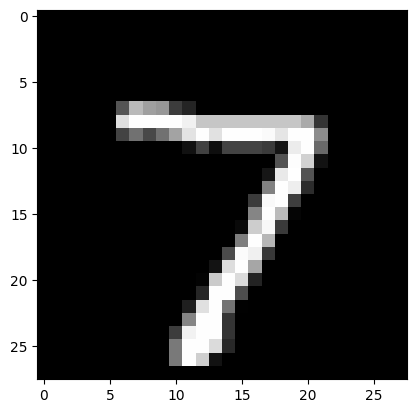

In [63]:
plt.imshow(img[0], cmap="gray")